# Sentiment Analysis of Silverlake Ramen Yelp Reviews

## From fillings, to text, to feelings!

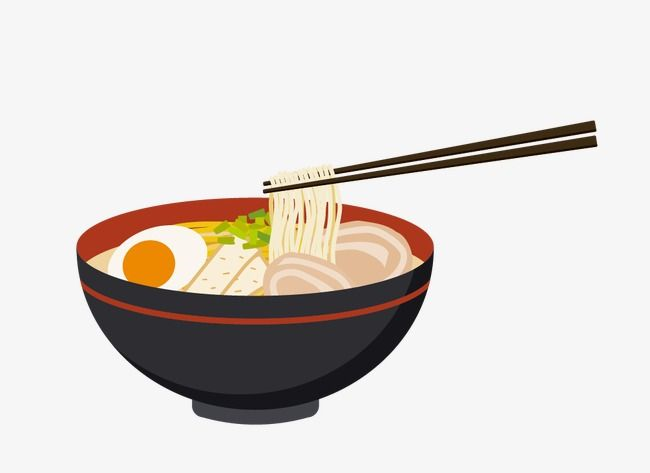

## Description

 Learning to scrape data has opened numerous doors for me. As a yelp user I am curious to see how my local ramen joint was doing. In this project I explore reviews and see how they translate into feelings using sentiment analysis. 
 *This project is aimed at gaining insights from a analytics standpoint and not a machine learning or predictive one.

### Questions in mind

- **Besides "ramen", what other words come up most often?**
- **What do the reviews say in terms of sentiment?**
- **From these reviews, what does the positive vs negative sentiment look like?**
- **Are there any combinations of words that stand out?**
- **From these reviews how many are actually updating?**
- **From these reviews how many are related to online delivery or COVID/quarantine?**



 

### 1. Setting Up Our Workstation and Load in Libraries, Yarimasho!

   Before we begin lets load in relevant packages.

In [32]:

library(tidyverse)
library(tidytext)
library(textdata)
library(wordcloud)

### 2. Retrieving our data from our console (post web scraping)


In [33]:
# We read the dataset from github 
url <- "https://raw.githubusercontent.com/Rlegaspi562/Visualization-of-Sentiment-Analysis-of-Yelp-reviews/master/silverlakeramenyelp_dataset.csv"
yelp <- read_csv(url)

# Checking data
str(yelp)
head(yelp)
glimpse(yelp)

Parsed with column specification:
cols(
  Reviews = col_character()
)


Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	315 obs. of  1 variable:
 $ Reviews: chr  "Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more." "Start your review of Silverlake Ramen." "I have been here at least 3 times to dine in person. Hospitality was always excellent but service was always sl"| __truncated__ "I ordered togo from this Silverlake Ramen at LBX yesterday, 5/5/2020. (Cant help but wonder if I was the only o"| __truncated__ ...
 - attr(*, "spec")=
  .. cols(
  ..   Reviews = col_character()
  .. )


Reviews                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1 Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
2 Start your review of Silverlake Ramen.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
3 I have been here at least 3 times to dine in person. Hospitality was always excellent but service was always slow since they are always so packed. Either arrive before the rush or order take out.                                                                                                                                                                                                                                                                                                                                                                                                                           
4 I ordered togo from this Silverlake Ramen at LBX yesterday, 5/5/2020. (Cant help but wonder if I was the only one in long beach eating ramen on cinco de mayo ) but anyways, I ordered then basic tonkotsu ramen and I was immediately impressed. The soup of the ramen was subtle and flavorful. Not at all salty or oily. The veggies tasted delightfully fresh and the noodles tasted as tho they were cut and boiled to perfection. The piece of chasu on top was melt in your delicious. On a separate occasion, I ordered the pork bun. It was massive and delicious as well!  Needless to say, I'll definitely be back.
5 Hi Bianca, I’m thrilled to see that you enjoyed your meal.  Take care!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
6 I have been here twice in the last two weeks and it is yummy. Great service and awesome food and high quality. My family and I love Silverlake Ramen, double thumbs up.

Observations: 315
Variables: 1
$ Reviews <chr> "Your trust is our top concern, so businesses can't pay to ...


### 3. Data Cleaning Using Tidy Principles: Entering the Tidyverse

In addition to reformatting our data to fit tidy principles, I will be __ommitting some rows in the dataset__. After reading the yelp data and due to the webscraping process, I notice that some observations are actually business owner replies and are being counted as additional observations themselves. Fortunately, since the dataset is fairly manageable I can go through and __remove business owner replies, duplicates, and any other text that are not reviews__.

#### 3a. Cleaning our data

In [34]:
# Removing business owner replies, yelp headings, and extra text.
yelp <- yelp[ -c(1, 2, 5, 7, 10, 23, 28, 29, 37, 40, 47, 56, 72, 79, 80, 93, 102, 103, 121, 126, 127, 128, 131, 151, 152, 162, 174, 175, 176, 193, 198, 199, 200, 219, 222, 223, 237, 246, 247, 268, 269, 283, 285, 292, 293, 304, 311) , ]

In [35]:

# Turning yelp data into a tibble format (data frame)
yelp_tibble <- as_tibble(yelp)

# Checking class to confirm
class(yelp_tibble)

# Removing duplicate rows 
yelp_tibble %>% distinct(value, .keep_all = TRUE) %>%
head()

# Print
head(yelp_tibble)


[1] "tbl_df"     "tbl"        "data.frame"

Warning message:
"Trying to compute distinct() for variables not found in the data:
- `value`
This is an error, but only a warning is raised for compatibility reasons.
The operation will return the input unchanged."

Reviews                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1 I have been here at least 3 times to dine in person. Hospitality was always excellent but service was always slow since they are always so packed. Either arrive before the rush or order take out.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

Reviews                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1 I have been here at least 3 times to dine in person. Hospitality was always excellent but service was always slow since they are always so packed. Either arrive before the rush or order take out.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

#### 3b. Tokenization

By performing tokenization, we essentially transform our tibble dataset into a data frame of one word per row. This will help ease the process of analyzing sentiment much easier by having our dataset in  this format. 

In [36]:

# Tokenization (unnesting) in preparation for sentiment analysis (inner_join) to transform nontidy text data into tidy text data
tidy_yelp <- yelp_tibble %>%
  unnest_tokens(word, Reviews)

# Removing stopwords from our tidy_yelp dataset that are extremely common e.g. is, of, a, etc...
data("stop_words")
tidy_yelp <- tidy_yelp %>%
  anti_join(stop_words) 

# Checking
head(tidy_yelp)

Joining, by = "word"


word       
1 3          
2 times      
3 dine       
4 person     
5 hospitality
6 excellent

In [37]:
# Our 3 types of data. Just in different formats!

# 1. Our raw data  
head(yelp)

# 2. Our tibble data
head(yelp_tibble)

# 3. Our tidy data
head(tidy_yelp)

Reviews                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1 I have been here at least 3 times to dine in person. Hospitality was always excellent but service was always slow since they are always so packed. Either arrive before the rush or order take out.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

Reviews                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1 I have been here at least 3 times to dine in person. Hospitality was always excellent but service was always slow since they are always so packed. Either arrive before the rush or order take out.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

word       
1 3          
2 times      
3 dine       
4 person     
5 hospitality
6 excellent

## 4. Output & Visualizations

### 4a.  Most Common Words: Wordcloud

To start off, lets create an aesthetically pleasing wordcloud that illustrates the top 50 words in our dataset.

Joining, by = "word"


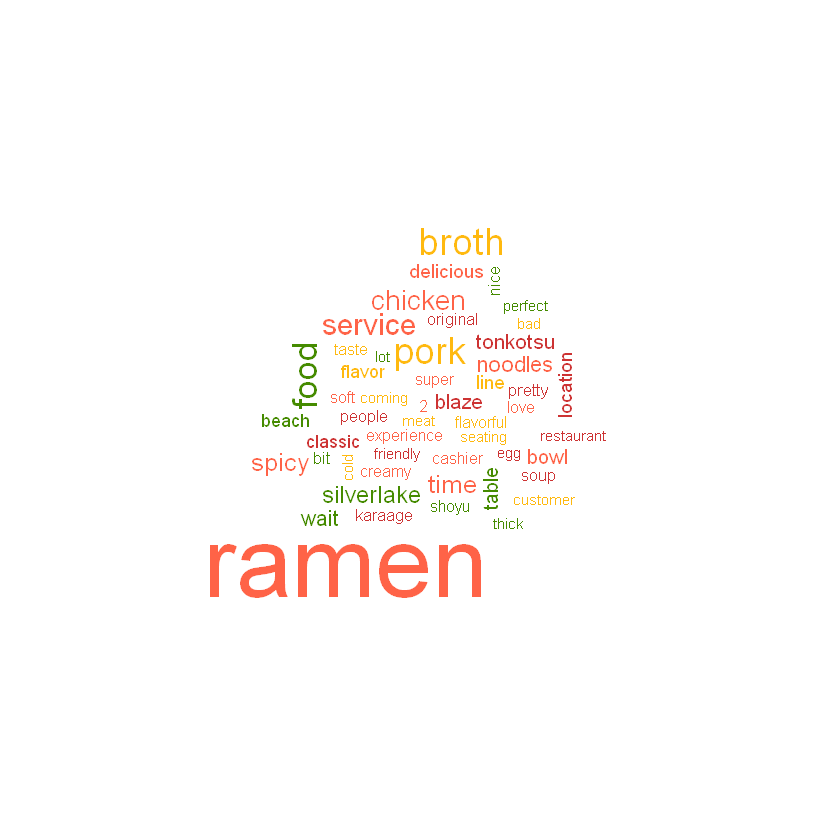

In [38]:

  #top 50 wordcloud
  tidy_yelp %>% 
    anti_join(stop_words) %>%
    count(word) %>%
    with(wordcloud(word,
                   freq = n,
                   scale=c(5,.5),
                   max.words = 50,
                   random.color = TRUE,
                   colors = c("brown3", "darkgoldenrod1", "tomato", "chartreuse4")))
  


### 4b. Most Common Words: Stacked Bar Chart

word           n  
1    ramen          513
2    broth          159
3    pork           153
4    food           141
5    service        115
6    chicken        101
7    time            85
8    spicy           84
9    silverlake      81
10   noodles         69
11   wait            69
12   tonkotsu        64
13   blaze           63
14   table           59
15   bowl            58
16   delicious       52
17   location        50
18   line            49
19   classic         46
20   flavor          45
21   beach           44
22   bit             39
23   pretty          39
24   soup            39
25   soft            36
26   cashier         35
27   creamy          35
28   karaage         35
29   nice            35
30   super           35
...  ...            ...
2475 west           1  
2476 wheat          1  
2477 wholeheartedly 1  
2478 wife's         1  
2479 will.come      1  
2480 wine           1  
2481 wings          1  
2482 wit            1  
2483 wok            1  
2484 wonderfully    1  
2485 wonders        1  
2486 wood           1  
2487 woody          1  
2488 worries        1  
2489 worrying       1  
2490 worthy         1  
2491 woth           1  
2492 wrath          1  
2493 writing        1  
2494 y'all.as       1  
2495 ya'll          1  
2496 yell           1  
2497 yellow         1  
2498 yelped         1  
2499 yelpers        1  
2500 yikes          1  
2501 yo             1  
2502 yolk           1  
2503 yooooo         1  
2504 zing           1

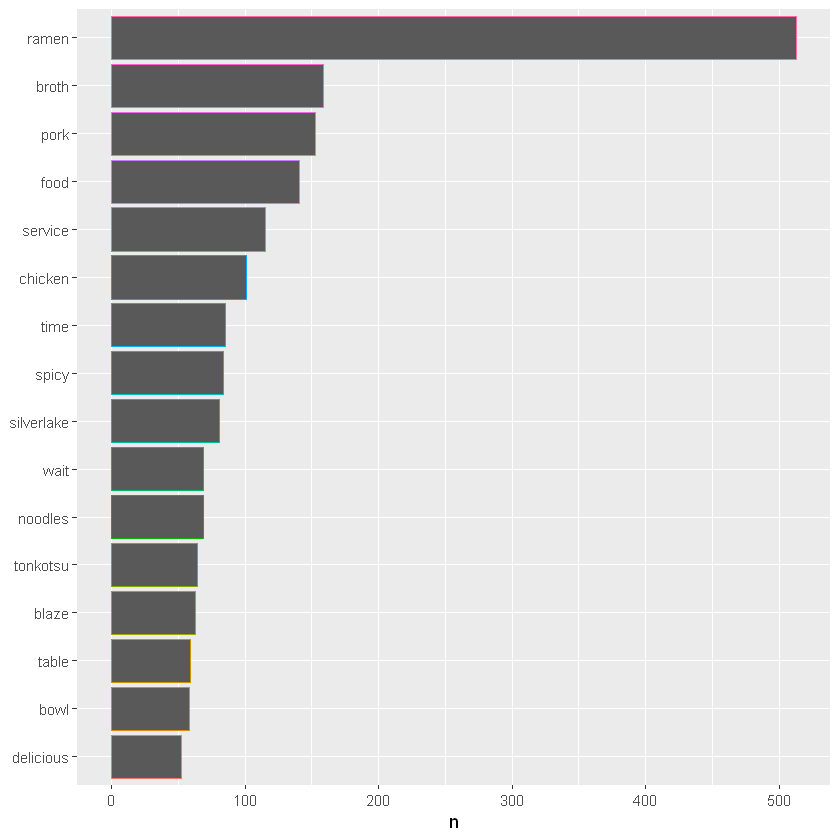

In [39]:

 #Output
tidy_yelp %>% 
  count(word, sort = TRUE) 

#Visual
tidy_yelp %>% 
  count(word, sort = TRUE) %>%
  filter(n > 50) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(x = word, y =n, color = word)) +
  geom_col() +
  xlab(NULL) +
  theme(legend.position="none") +
  coord_flip() 

### 4c.  Positive vs Negative Sentiment 
Here we introduce sentiment. But to do so, we first have to introduce "lexicons" to understand how these words are categorized by a "sentiment". There are different kinds of lexicons, and we can think of these lexicons as a kind of dictionary. One of which is the "bing" lexicon that we will be using. When the "bing" lexicon is applied with our text set it will indicate whether a word is positive or negative.  

In [40]:
# Implementing sentiment analysis
silverlake_bing_sentiment <- tidy_yelp %>%
  inner_join(get_sentiments("bing")) 


# Output
head(silverlake_bing_sentiment)

Joining, by = "word"


word         sentiment
1 excellent    positive 
2 slow         negative 
3 impressed    positive 
4 delightfully positive 
5 fresh        positive 
6 perfection   positive

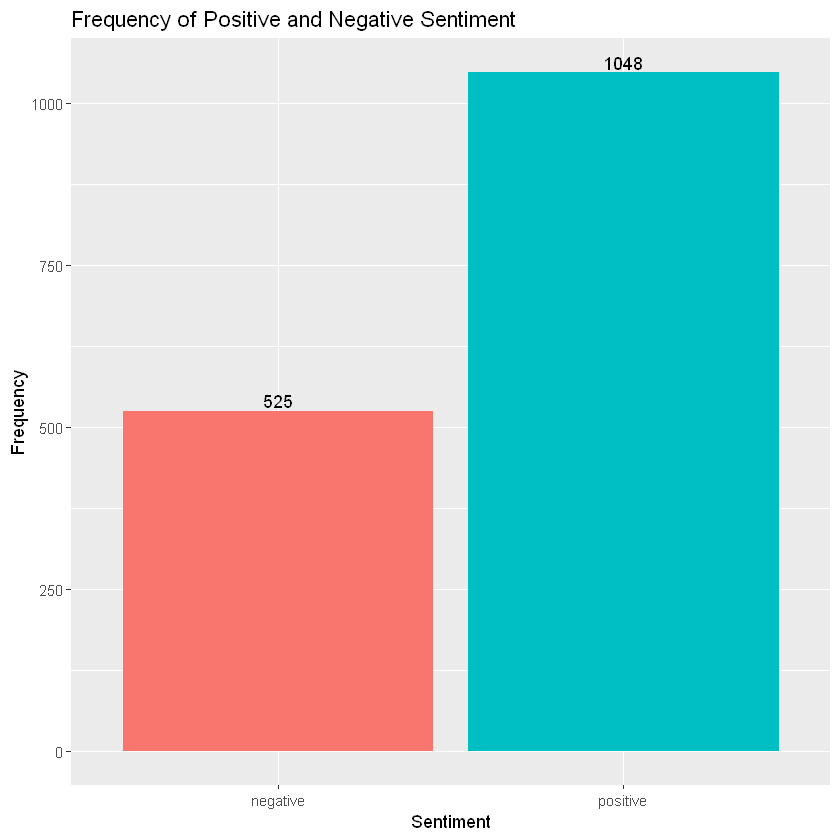

In [41]:
# Creating the visual
silverlake_bing_sentiment_bar <- silverlake_bing_sentiment %>% 
  count(sentiment) %>%

# Piping our previous output into a neat barchart to visualize
ggplot(aes(x = sentiment, y = n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  xlab("Sentiment") +
  ylab("Frequency") +
  ggtitle("Frequency of Positive and Negative Sentiment") +
  geom_text(aes(label = n), position = position_dodge(width = 0.9), vjust = -0.25)

# Printing
silverlake_bing_sentiment_bar

### 4d. Digging Deeper: What Words Contribute to Each Positive/Negative Sentiment?

Joining, by = "word"


word      sentiment n 
1 delicious positive  52
2 classic   positive  46
3 pretty    positive  39
4 soft      positive  36
5 nice      positive  35
6 super     positive  35

Selecting by n


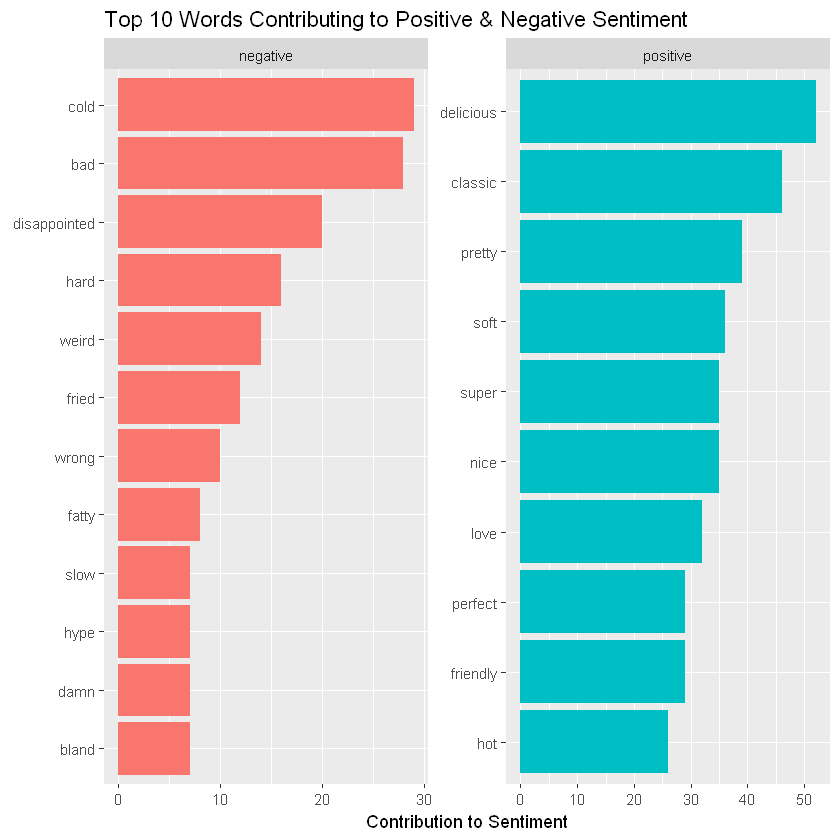

In [42]:

# In this line of code we add our custom stop words 
yelp_bing_counts <- tidy_yelp %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

# Output
head(yelp_bing_counts)

# Visual
yelp_bing_counts %>%
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(x = word, y = n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free") +
  labs(y = "Contribution to Sentiment",
       x = NULL) +
  ggtitle("Top 10 Words Contributing to Positive & Negative Sentiment") +
  coord_flip()

#### Removing Anamolies in Our Analysis

Immediately after looking through the bar charts we see some words being mistaken for the wrong sentiment. These words: fried, fatty, damn, and classic/blaze (item names on the menu), are words that are not necessarily negative/positive in a restaurant setting and can definitely be taken out of context in our visual so lets remove them. Lets also appreciate how the "bing" lexicon correctly identifies the word "cold" as negative and "hot" as positive, which is perfectly suitable in this case!

In [43]:
# We will create our own custom stop words
custom_stop_words1 <- bind_rows(tibble(word = c("fried", "damn", "hype", "classic", "blaze"), 
                                          lexicon = c("custom")), 
                               stop_words)

head(custom_stop_words1)

word    lexicon
1 fried   custom 
2 damn    custom 
3 hype    custom 
4 classic custom 
5 blaze   custom 
6 a       SMART

Joining, by = "word"
Joining, by = "word"


word      sentiment n 
1 delicious positive  52
2 pretty    positive  39
3 soft      positive  36
4 nice      positive  35
5 super     positive  35
6 love      positive  32

Selecting by n


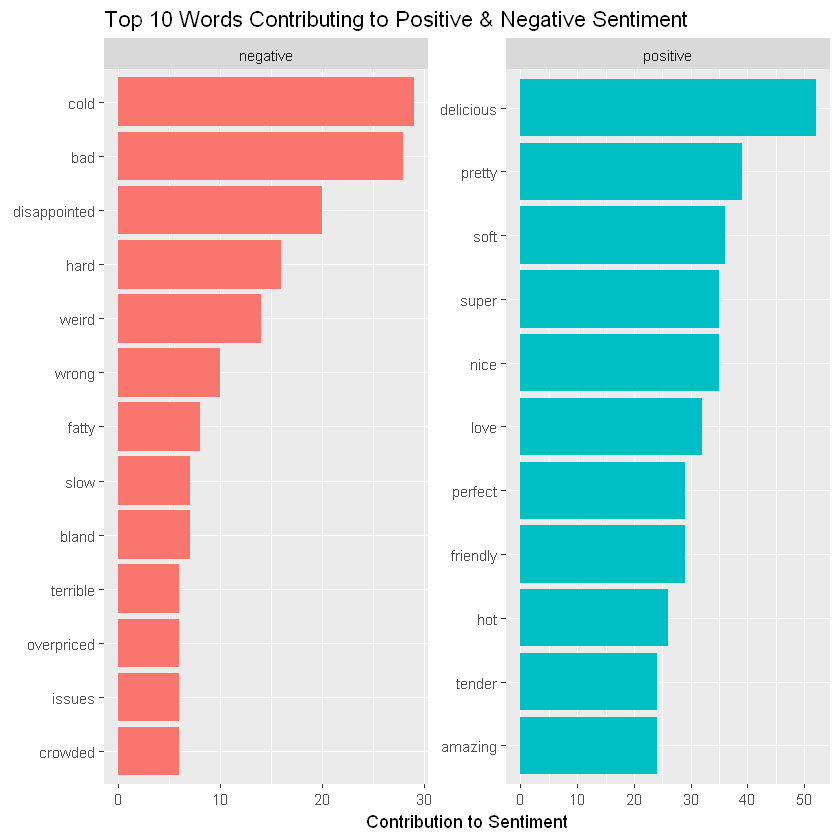

In [44]:
# Here are our new updated outputs and visuals!

# In this line of code we add our custom stop words
yelp_bing_counts <- tidy_yelp %>%
  inner_join(get_sentiments("bing")) %>%
  anti_join(custom_stop_words1) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

# Print Output
head(yelp_bing_counts)

# Visual
yelp_bing_counts %>%
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%

  ggplot(aes(x = word, y = n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free") +
  labs(y =  "Contribution to Sentiment",
       x = NULL) +
  ggtitle("Top 10 Words Contributing to Positive & Negative Sentiment") +
  coord_flip()

#### Great! Now these words make more sense in their respective sentiments.

### 4e. Categorizing Emotion

In this visual, we will be displaying emotions using the __"nrc" lexicon__. I will also filter out the trust/fear and positive/negative sentiments because it is also hard to truly gauge fear and trust with single text. Positive/negative sentiments will also be filtered out because it has already been analyzed previously. 

In [45]:
# Adjusting the "nrc" lexicon before implementation
 drop_sentiments <- c("fear", "trust", "positive", "negative")
 new_nrc <- get_sentiments("nrc") %>% 
filter(!sentiment %in% drop_sentiments)

# Print to check
head(new_nrc)

# Future me sees the data and needs to adjust
# Therefore we Create our second custom stop words because these words either fit in the wrong emotion or are neutral
custom_stop_words2 <- bind_rows(tibble(word = c("food", "blaze", "yelp", "fatty", "damn","beach", "mouth", "deal", "pretty", "black", "tough", "chance", "mouth", "deal", "hope", "guess", "finally", "chicken", "serve", "feeling", "music", "leave", "bomb", "shopping", "perfect", "hot", "kick", "food"), 
                                          lexicon = c("custom")), 
                               stop_words)
# Print to check
head(custom_stop_words2)

word        sentiment
1 abandon     sadness  
2 abandoned   anger    
3 abandoned   sadness  
4 abandonment anger    
5 abandonment sadness  
6 abandonment surprise

word  lexicon
1 food  custom 
2 blaze custom 
3 yelp  custom 
4 fatty custom 
5 damn  custom 
6 beach custom

Joining, by = "word"
Joining, by = "word"


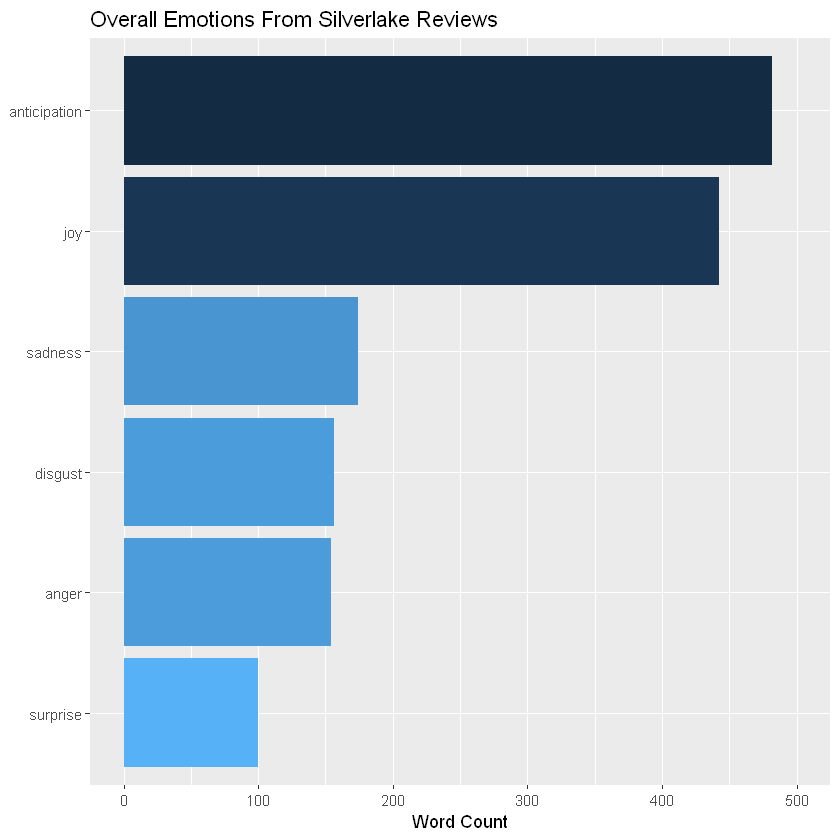

In [46]:

# Implement sentiment analysis using our "new_nrc" lexicon 
 yelp_nrc <- tidy_yelp %>%
    inner_join(new_nrc) %>%
    anti_join(custom_stop_words2)
  
  
  yelp_nrc_plot <- yelp_nrc %>%
    group_by(sentiment) %>%
    summarise(word_count = n()) %>%
    ungroup() %>%
    mutate(sentiment = reorder(sentiment, word_count)) %>%
    
# Creating our visual
    ggplot(aes(sentiment, word_count, fill = -word_count)) +
    geom_col() +
    guides(fill = FALSE) + 
    labs(x = NULL, y = "Word Count") +
    scale_y_continuous(limits = c(0, 500)) + #Hard coding the axis limit
    ggtitle("Overall Emotions From Silverlake Reviews") +
    coord_flip()
  
  yelp_nrc_plot

#### Looks like _"anticipation"_ and _"joy"_ is in the air!

### 4f. Top Words Contributing to Each Respective Emotion

Joining, by = "word"
Joining, by = "word"
Selecting by n


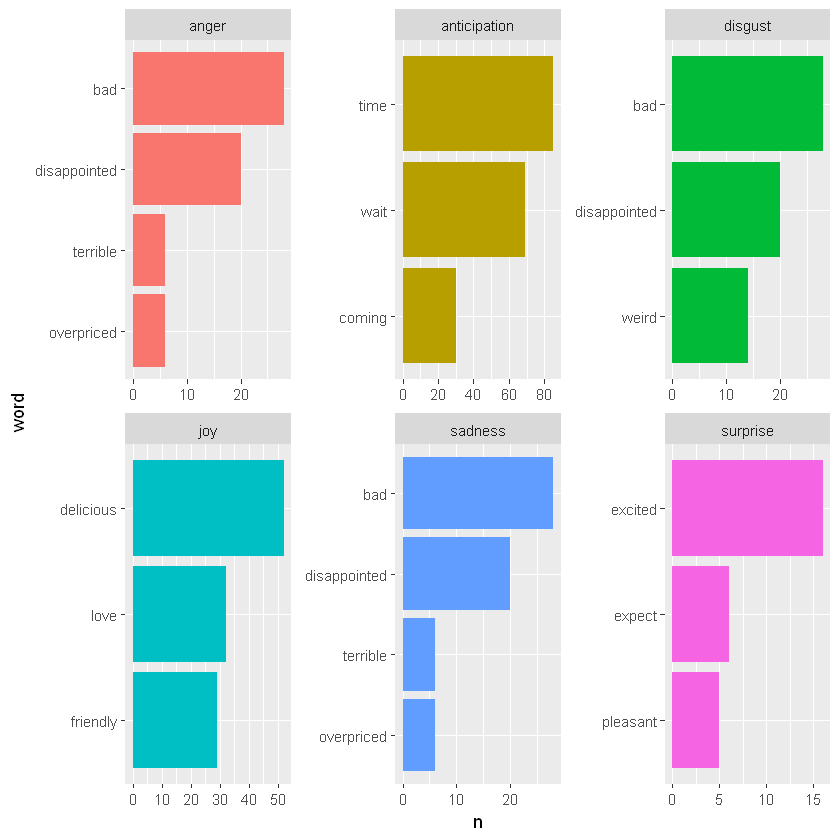

In [47]:

# Implementing sentiment analysis
  yelp_nrc <- tidy_yelp %>%
    inner_join(new_nrc) %>%
    anti_join(custom_stop_words2)
    
  
# Which words contribute to the sentiment scores?
  yelp_nrc  %>%
    count(word, sentiment) %>%
    group_by(sentiment) %>%
    top_n(3) %>%
    ungroup() %>%
    mutate(word = reorder(word, n)) %>%
    ggplot(aes(x = word, y = n, fill = sentiment)) +
    geom_col(show.legend = FALSE) +
    facet_wrap(~ sentiment, scales = "free") +
    coord_flip()

In [17]:
END

ERROR: Error in eval(expr, envir, enclos): object 'END' not found


## Looking at the Relationships of Words

Similar to tokenizations, we will be using something called "tokens = ngrams". This will allow us to categorize our data by "n" many words per row and see how often word X is followed by word Y.

In [55]:
head(yelp_tibble)

Reviews                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1 I have been here at least 3 times to dine in person. Hospitality was always excellent but service was always slow since they are always so packed. Either arrive before the rush or order take out.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [65]:
silverlake_bigrams <- yelp_tibble %>%
unnest_tokens(bigram, Reviews, token = "ngrams", n = 2)

# Printing 
print(silverlake_bigrams, c[1-10],)

silverlake_bigrams %>%
  count(bigram, sort = TRUE)

# A tibble: 29,073 x 1
   bigram   
   <chr>    
 1 i have   
 2 have been
 3 been here
 4 here at  
 5 at least 
 6 least 3  
 7 3 times  
 8 times to 
 9 to dine  
10 dine in  
# ... with 29,063 more rows


bigram                 n  
1     it was                 127
2     and the                111
3     in the                  84
4     to the                  83
5     of the                  82
6     this place              78
7     the broth               72
8     the ramen               70
9     and i                   66
10    on the                  61
11    the pork                60
12    i was                   55
13    the blaze               54
14    was a                   54
15    silverlake ramen        51
16    ordered the             50
17    with the                50
18    ramen and               49
19    the food                46
20    broth was               44
21    is a                    44
22    but i                   43
23    for the                 43
24    but the                 42
25    long beach              42
26    to be                   42
27    a little                40
28    and it                  39
29    got the                 39
30    at the                  38
...   ...                    ...
16325 your option            1  
16326 your product           1  
16327 your protein           1  
16328 your signature         1  
16329 your so                1  
16330 your staff's           1  
16331 your stomach           1  
16332 your taste             1  
16333 your trust             1  
16334 your tummy             1  
16335 your wallet            1  
16336 your water             1  
16337 yourself a             1  
16338 yourself establishment 1  
16339 yourself if            1  
16340 yourself it            1  
16341 yum i                  1  
16342 yum my                 1  
16343 yum yummy              1  
16344 yummy and              1  
16345 yummy as               1  
16346 yummy broth            1  
16347 yummy but              1  
16348 yummy great            1  
16349 yummy had              1  
16350 yummy i                1  
16351 yummy place            1  
16352 yummy ramen            1  
16353 yummy yum              1  
16354 zing that              1

Extra Code

In [ ]:



# Removing special characters
tyelp_tibble<- lapply(yelp_tibble, gsub, pattern=c("â"), replacement="")
yelp_tibble<- lapply(yelp_tibble, gsub, pattern=c("Â"), replacement="")
tidy_yelp<- as_tibble(yelp_tibble)
tidy_yelp



# We read the dataset from github and set stringsAsfactors = FALSE so our dataset is in character type 
yelp <- read.csv("https://raw.githubusercontent.com/Rlegaspi562/Visualization-of-Sentiment-Analysis-of-Yelp-reviews/master/silverlakeramenyelp_dataset.csv", stringsAsFactors = FALSE, header = TRUE)

# Checking data
str(yelp)
head(yelp)



# Renaming value back to Reviews as variable name
yelp_tibble <- yelp_tibble %>% rename(Reviews = value)
colnames(yelp_tibble)


 #Output
tidy_yelp %>%
filter(word == "update") %>%
  count(word, sort = TRUE) %>%
  mutate(total = sum(n),
        percent = sum(n)/total)